In [0]:
!pip install lightgbm

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Machine Learning Libraries
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Figures
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [0]:
url="https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/NHL-Game-II/main/Period_1_Game_Stats_Final_ModelReady.csv"
df = pd.read_csv(url)
df = df[:-9611]
df.drop(df.index[18800:40871],0,inplace=True)
df = df.reset_index(drop=True)
df.isna().sum()

# split data into X and y
y = df.pop('won')
X = df
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

# make predictions for test data
from sklearn.metrics import precision_score, recall_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

/databricks/python/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
[20]	training's binary_logloss: 0.588145	valid_0's binary_logloss: 0.602557
[40]	training's binary_logloss: 0.564346	valid_0's binary_logloss: 0.599359
[60]	training's binary_logloss: 0.546199	valid_0's binary_logloss: 0.600596
[80]	training's binary_logloss: 0.529762	valid_0's binary_logloss: 0.60314
[100]	training's binary_logloss: 0.514817	valid_0's binary_logloss: 0.604746
Accuracy: 65.38%
Precision score:  0.6565500154846702
Recall score:  0.6459475929311396


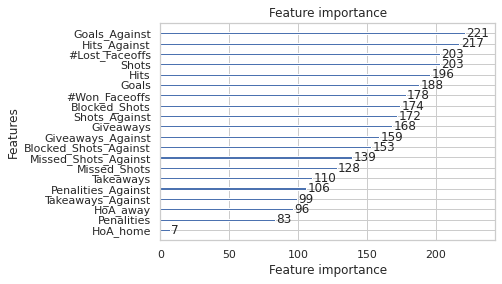

In [0]:
import lightgbm
from matplotlib import pyplot
lightgbm.plot_importance(model)
pyplot.show()

Out[79]: <AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

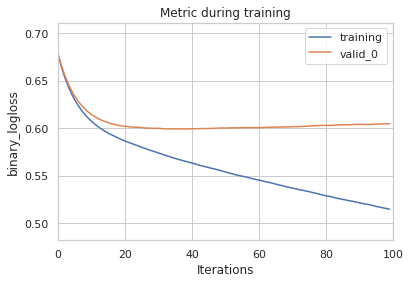

In [0]:
lgb.plot_metric(model)

Out[77]: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f002c140850>

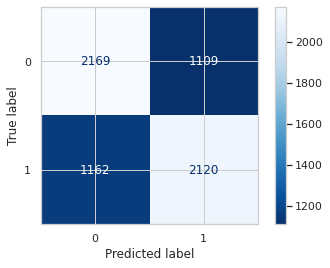

In [0]:
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [0]:
#print(metrics.classification_report(y_test,model.predict(X_test)))

In [0]:
# make predictions for tonight data
def tonight_bet(shots, shots_against, goals,goals_against, takeaways, takeaways_against, hits, hits_against, blockedShots, blockedShots_against, giveaways, giveaways_against, missedShots, missedShots_against, penalties, penalties_against, Won_Faceoffs, Lost_Faceoffs, hoa_away, hoa_home):
    bet_df = pd.DataFrame({"shots": [shots],"shots_against": [shots_against],"goals": [goals],"goals_against": [goals_against],"takeaways": [takeaways],"takeaways_against": [takeaways_against],"hits": [hits],"hits_against": [hits_against]
                       ,"blockedShots": [blockedShots],"blockedShots_against": [blockedShots_against],"giveaways": [giveaways],"giveaways_against": [giveaways_against],"missedShots": [missedShots],"missedShots_against": [missedShots_against]
                       ,"penalties": [penalties],"penalties_against": [penalties_against],"#Won Faceoffs": [Won_Faceoffs],"#Lost Faceoffs": [Lost_Faceoffs],"hoa_away": [hoa_away],"hoa_home": [hoa_home],},index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],)
    bet_df = bet_df.iloc[:1 , :]
    tonights_team = bet_df
    return tonights_team

In [0]:
# make predictions for test data
X_Game_test = tonight_bet(30,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0)
# store value to use in model

Game_y_pred = model.predict(X_Game_test)
prediction = [round(value) for value in Game_y_pred]
print(prediction)
probability = model.predict_proba(X_Game_test)
print(probability)

[1]
[[0.44167824 0.55832176]]


# API SportsRadar Request

In [0]:
# API Packages
import requests
import json
from datetime import date
from datetime import datetime,timedelta

api_key = "sa8b3wuwy549qwy6jw6srsgv"
print("API Key:",api_key)

API Key: sa8b3wuwy549qwy6jw6srsgv


## Today's Games

In [0]:
# get daily schedule
today = date.today()
Day = today.strftime("%d")
Month = today.strftime("%m")
Year = today.strftime("%Y")
response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{Year}/{Month}/{Day}/schedule.json?api_key=sa8b3wuwy549qwy6jw6srsgv").format(Day = 21, Month = Month, Year = Year))
daily_schedule = response.json()
games = daily_schedule['games']
games

Out[26]: [{'id': '24780d52-a26c-41f8-a3aa-fcc4fbb321fb',
  'status': 'inprogress',
  'coverage': 'full',
  'scheduled': '2022-04-21T23:00:00Z',
  'sr_id': 'sr:match:28276500',
  'reference': '21233',
  'venue': {'id': '2ee8c0bf-dfd1-480c-80df-4d5f66a9dc76',
   'name': 'Bell Centre',
   'capacity': 21288,
   'address': '1909 Avenue des Canadiens-de-Montreal',
   'city': 'Montreal',
   'state': 'QC',
   'country': 'CAN',
   'time_zone': 'US/Eastern',
   'sr_id': 'sr:venue:6034'},
  'broadcasts': [{'network': 'TSN2', 'type': 'TV', 'locale': 'International'},
   {'network': 'RDS', 'type': 'TV', 'locale': 'International'},
   {'network': 'NBCS-PH', 'type': 'TV', 'locale': 'Away'}],
  'home': {'id': '441713b7-0f24-11e2-8525-18a905767e44',
   'name': 'Montreal Canadiens',
   'alias': 'MTL',
   'sr_id': 'sr:team:3690',
   'reference': '8'},
  'away': {'id': '44179d47-0f24-11e2-8525-18a905767e44',
   'name': 'Philadelphia Flyers',
   'alias': 'PHI',
   'sr_id': 'sr:team:3699',
   'reference': '

# Dashboards Live Games

In [0]:
from datetime import datetime, timedelta
games_dict = {
    'home_team': [],
    'away_team': [],
    'game_status': [],
    'start_time': []
}

def timeparser(x):
    x = x.replace('T', ' ')
    x = x.replace('Z', '')
    x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - timedelta(hours=4)
    return x.strftime('%H:%M')

for game in games:
    #if (game['status'] == 'inprogress'):
    games_dict['home_team'].append(game['home']['name'])
    games_dict['away_team'].append(game['away']['name'])
    games_dict['game_status'].append(game['status'])
    games_dict['start_time'].append(timeparser(game['scheduled']))

data = pd.DataFrame.from_dict(games_dict)

In [0]:
data

,home_team,away_team,game_status,start_time
0,Montreal Canadiens,Philadelphia Flyers,inprogress,19:00
1,New Jersey Devils,Buffalo Sabres,complete,19:00
2,Florida Panthers,Detroit Red Wings,inprogress,19:00
3,Pittsburgh Penguins,Boston Bruins,inprogress,19:00
4,Carolina Hurricanes,Winnipeg Jets,inprogress,19:00
5,New York Islanders,New York Rangers,inprogress,19:30
6,Tampa Bay Lightning,Toronto Maple Leafs,inprogress,20:00
7,Minnesota Wild,Vancouver Canucks,inprogress,20:00
8,Calgary Flames,Dallas Stars,inprogress,21:00
9,San Jose Sharks,St. Louis Blues,scheduled,22:30


In [0]:
html_code = \
"""
    <!DOCTYPE html>
    <html><body>
    <center><h1> Games Scheduled Tonight </h1></center>
"""
displayHTML(html_code)

<!DOCTYPE html>
 
 Games Scheduled Tonight

In [0]:
html_code = "<!DOCTYPE html><html><body><center>"
for i in range(len(data['home_team'])):
    html_code += """ {} vs. {} at {} <br/> <br/> """.format(data['home_team'][i], data['away_team'][i], data['start_time'][i])

html_code += "</center></body></html>"
displayHTML(html_code)

<!DOCTYPE html> Montreal Canadiens vs. Philadelphia Flyers at 19:00 New Jersey Devils vs. Buffalo Sabres at 19:00 Florida Panthers vs. Detroit Red Wings at 19:00 Pittsburgh Penguins vs. Boston Bruins at 19:00 Carolina Hurricanes vs. Winnipeg Jets at 19:00 New York Islanders vs. New York Rangers at 19:30 Tampa Bay Lightning vs. Toronto Maple Leafs at 20:00 Minnesota Wild vs. Vancouver Canucks at 20:00 Calgary Flames vs. Dallas Stars at 21:00 San Jose Sharks vs. St. Louis Blues at 22:30 Los Angeles Kings vs. Chicago Blackhawks at 22:30

## Current Game Stats

In [0]:
def Game_Team_Stats(game_num, hoa):
    if (games[game_num]['status'] == 'inprogress'):
        # get play by play information for the game and away team
        game_id = games[game_num]['id']
        team_id = games[game_num][hoa]['id']
        
        response = requests.get(("https://api.sportradar.us/nhl/trial/v7/en/games/{obj}/pbp.json?api_key=sa8b3wuwy549qwy6jw6srsgv")
                                .format(obj = game_id))
        play_by_play = response.json()
        play_by_play

        # get list of all periods 
        period_info = play_by_play['periods']

        # get all events in period 1
        events = period_info[0]['events']

        # get team stats
        team_stats = {
            # name
            'name': games[game_num][hoa]['name'],
            # goals
            'goals': 0,
            # shots
            'shotsaved': 0,
            # takeaway
            'takeaway': 0,
            # hits
            'hit': 0,
            # shot blocked
            'shotblocked': 0,
            # giveaway
            'giveaway': 0,
            # shot missed
            'shotmissed': 0,
            # penalties
            'penalty': 0,
            # faceoff
            'faceoff': 0,
            # HoA home 1 - away 0
            'home': 0,
        }
        
        # goals
        team_stats['goals'] = period_info[0]['scoring'][hoa]['points']
        
        # home
        if (hoa == 'home'): team_stats['home'] = 1
        
        # other events
        for event in events:
            if ('attribution' in event.keys() and event['attribution']['id'] == team_id):
                if (event['event_type'] in team_stats.keys() and event['event_type'] != 'shotmissed'):
                    team_stats[event['event_type']] += 1
                elif ('missed' in event['description']): 
                    team_stats['shotmissed'] += 1
                elif ('blocked' in event['description']):
                    team_stats['shotblocked'] += 1
        
        # return statement
        return team_stats
    
    # if the game is not live
    return 'Game not live'

num_games = len(daily_schedule['games'])
num_games

Out[45]: 11

In [0]:
text = "<center><h1> First Period Stats: </h1></center>"
displayHTML(text)

First Period Stats:

In [0]:
num_games = len(daily_schedule['games'])
game_stats_home = []
game_stats_away = []

for i in range(num_games):
    results_home = Game_Team_Stats(i, 'home')
    results_away = Game_Team_Stats(i, 'away')
    if type(results_home) is dict:
        game_stats_home.append(results_home)
    if type(results_away) is dict:
        game_stats_away.append(results_away)

In [0]:
def print_stats(team_stats, game_num, hoa):
    text ="<h2> {} Team: {} </h2>".format(hoa, games[game_num][hoa.lower()]['name'])
    text +="Goals: {} </br>".format(team_stats['goals'])
    text +="Shot Saved: {} </br>".format(team_stats['shotsaved'])
    text +="Shots Blocked: {} </br>".format(team_stats['shotblocked'])
    text +="Shots Missed: {} </br>".format(team_stats['shotmissed'])
    text +="Takeaways: {} </br>".format(team_stats['takeaway'])
    text +="Hits: {} </br>".format(team_stats['hit'])
    text +="Giveaways: {} </br>".format(team_stats['giveaway'])
    text +="Penalties: {} </br>".format(team_stats['penalty'])
    text +="Faceoffs: {} </br>".format(team_stats['faceoff'])
    return text

In [0]:
display_text = "<!DOCTYPE html><html><body>"
for i in range(len(game_stats_home)):
    display_text += print_stats(game_stats_home[i], i, 'Home')
display_text += "</body></html>"
 
displayHTML(display_text)

<!DOCTYPE html> Home Team: Montreal Canadiens Goals: 1 Shot Saved: 8 Shots Blocked: 10 Shots Missed: 4 Takeaways: 1 Hits: 4 Giveaways: 7 Penalties: 1 Faceoffs: 10 Home Team: New Jersey Devils Goals: 3 Shot Saved: 4 Shots Blocked: 3 Shots Missed: 2 Takeaways: 4 Hits: 8 Giveaways: 3 Penalties: 1 Faceoffs: 9 Home Team: Florida Panthers Goals: 1 Shot Saved: 12 Shots Blocked: 4 Shots Missed: 3 Takeaways: 5 Hits: 7 Giveaways: 1 Penalties: 0 Faceoffs: 7 Home Team: Pittsburgh Penguins Goals: 0 Shot Saved: 15 Shots Blocked: 3 Shots Missed: 11 Takeaways: 4 Hits: 2 Giveaways: 2 Penalties: 2 Faceoffs: 12 Home Team: Carolina Hurricanes Goals: 0 Shot Saved: 8 Shots Blocked: 1 Shots Missed: 3 Takeaways: 5 Hits: 8 Giveaways: 3 Penalties: 0 Faceoffs: 7 Home Team: New York Islanders Goals: 0 Shot Saved: 7 Shots Blocked: 8 Shots Missed: 5 Takeaways: 2 Hits: 18 Giveaways: 1 Penalties: 2 Faceoffs: 7 Home Team: Tampa Bay Lightning Goals: 0 Shot Saved: 8 Shots Blocked: 3 Shots Missed: 4 Takeaways: 1 Hits: 8 Giveaways: 3 Penalties: 1 Faceoffs: 5 Home Team: Minnesota Wild Goals: 0 Shot Saved: 11 Shots Blocked: 3 Shots Missed: 3 Takeaways: 3 Hits: 8 Giveaways: 4 Penalties: 3 Faceoffs: 7

In [0]:
display_text = "<!DOCTYPE html><html><body>"
for i in range(len(game_stats_away)):
    display_text += print_stats(game_stats_away[i], i, 'Away')
display_text += "</body></html>"
 
displayHTML(display_text)

<!DOCTYPE html> Away Team: Philadelphia Flyers Goals: 2 Shot Saved: 5 Shots Blocked: 7 Shots Missed: 2 Takeaways: 6 Hits: 11 Giveaways: 3 Penalties: 1 Faceoffs: 7 Away Team: Buffalo Sabres Goals: 1 Shot Saved: 11 Shots Blocked: 6 Shots Missed: 4 Takeaways: 1 Hits: 5 Giveaways: 5 Penalties: 1 Faceoffs: 5 Away Team: Detroit Red Wings Goals: 0 Shot Saved: 11 Shots Blocked: 4 Shots Missed: 2 Takeaways: 5 Hits: 15 Giveaways: 4 Penalties: 1 Faceoffs: 10 Away Team: Boston Bruins Goals: 2 Shot Saved: 5 Shots Blocked: 4 Shots Missed: 2 Takeaways: 1 Hits: 7 Giveaways: 2 Penalties: 3 Faceoffs: 7 Away Team: Winnipeg Jets Goals: 3 Shot Saved: 6 Shots Blocked: 2 Shots Missed: 2 Takeaways: 6 Hits: 13 Giveaways: 6 Penalties: 0 Faceoffs: 5 Away Team: New York Rangers Goals: 0 Shot Saved: 14 Shots Blocked: 9 Shots Missed: 2 Takeaways: 1 Hits: 11 Giveaways: 1 Penalties: 1 Faceoffs: 10 Away Team: Toronto Maple Leafs Goals: 0 Shot Saved: 10 Shots Blocked: 6 Shots Missed: 8 Takeaways: 1 Hits: 11 Giveaways: 1 Penalties: 1 Faceoffs: 10 Away Team: Vancouver Canucks Goals: 0 Shot Saved: 11 Shots Blocked: 7 Shots Missed: 2 Takeaways: 0 Hits: 3 Giveaways: 4 Penalties: 2 Faceoffs: 13

In [0]:
pdf = pd.DataFrame(game_stats_home).drop('name', axis=1)
pdf = pdf[['shotsaved', 'goals', 'takeaway', 'hit', 'shotblocked', 'giveaway', 'shotmissed', 'penalty', 'faceoff', 'home']]
pdf

,shotsaved,goals,takeaway,hit,shotblocked,giveaway,shotmissed,penalty,faceoff,home
0,8,1,1,4,10,7,4,1,10,1
1,4,3,4,8,3,3,2,1,9,1
2,12,1,5,7,4,1,3,0,7,1
3,15,0,4,2,3,2,11,2,12,1
4,8,0,5,8,1,3,3,0,7,1
5,7,0,2,18,8,1,5,2,7,1
6,8,0,1,8,3,3,4,1,5,1
7,11,0,3,8,3,4,3,3,7,1


In [0]:
pdf_away = pd.DataFrame(game_stats_away).drop('name', axis=1)
pdf_away = pdf_away[['shotsaved', 'goals', 'takeaway', 'hit', 'shotblocked', 'giveaway', 'shotmissed', 'penalty', 'faceoff', 'home']]
pdf_away.columns = ['shotsaved2', 'goals2', 'takeaway2', 'hit2', 'shotblocked2', 'giveaway2', 'shotmissed2', 'penalty2', 'faceoff2', 'home2']
pdf_away

,shotsaved2,goals2,takeaway2,hit2,shotblocked2,giveaway2,shotmissed2,penalty2,faceoff2,home2
0,5,2,6,11,7,3,2,1,7,0
1,11,1,1,5,6,5,4,1,5,0
2,11,0,5,15,4,4,2,1,10,0
3,5,2,1,7,4,2,2,3,7,0
4,6,3,6,13,2,6,2,0,5,0
5,14,0,1,11,9,1,2,1,10,0
6,10,0,1,11,6,1,8,1,10,0
7,11,0,0,3,7,4,2,2,13,0


In [0]:
merged = pd.concat([pdf, pdf_away], axis=1)
merged.columns = ['shotsaved', 'shotsaved2', 'goals', 'goals2', 'takeaway', 'takeaway2', 'hit', 'hit2', 'shotblocked', 'shotblocked2', 'giveaway', 'giveaway2', 'shotmissed', 'shotmissed2', 'penalty', 'penalty2', 'faceoff', 'faceoff2', 'home', 'home2']
merged

,shotsaved,shotsaved2,goals,goals2,takeaway,takeaway2,hit,hit2,shotblocked,shotblocked2,giveaway,giveaway2,shotmissed,shotmissed2,penalty,penalty2,faceoff,faceoff2,home,home2
0,8,1,1,4,10,7,4,1,10,1,5,2,6,11,7,3,2,1,7,0
1,4,3,4,8,3,3,2,1,9,1,11,1,1,5,6,5,4,1,5,0
2,12,1,5,7,4,1,3,0,7,1,11,0,5,15,4,4,2,1,10,0
3,15,0,4,2,3,2,11,2,12,1,5,2,1,7,4,2,2,3,7,0
4,8,0,5,8,1,3,3,0,7,1,6,3,6,13,2,6,2,0,5,0
5,7,0,2,18,8,1,5,2,7,1,14,0,1,11,9,1,2,1,10,0
6,8,0,1,8,3,3,4,1,5,1,10,0,1,11,6,1,8,1,10,0
7,11,0,3,8,3,4,3,3,7,1,11,0,0,3,7,4,2,2,13,0


In [0]:
# make prediction
predictions = []
for i in range(merged.shape[0]):
    row = merged.loc[[i]]
    Game_y_pred = model.predict(row)
    prediction = [round(value) for value in Game_y_pred]
    predictions.append(prediction)
    print(prediction)
    probability = model.predict_proba(row)
    print(probability)

[0]
[[0.95663 0.04337]]
[0]
[[0.51046646 0.48953354]]
[1]
[[0.37187344 0.62812656]]
[1]
[[0.06905247 0.93094753]]
[1]
[[0.47398205 0.52601795]]
[0]
[[0.89555482 0.10444518]]
[0]
[[0.91692232 0.08307768]]
[0]
[[0.60197927 0.39802073]]


In [0]:
winners = []
for i in range(len(predictions)):
    if predictions[i]:
        winners.append(game_stats_away[i]['name'])
    else:
        winners.append(game_stats_home[i]['name'])

In [0]:
text = "<center><h1 style=\"color:red\"> Predictions for the Games in Progress </h1></center>"
displayHTML(text)

Predictions for the Games in Progress

In [0]:
display_text = "<!DOCTYPE html><html><body><h4 style=\"color:red\"><center>"
for team in winners:
    display_text += team + " will win the game. <br><br>"
display_text += "</center></h4></body></html>"
displayHTML(display_text)

<!DOCTYPE html> Philadelphia Flyers will win the game. Detroit Red Wings will win the game. Boston Bruins will win the game. Winnipeg Jets will win the game. New York Rangers will win the game. Toronto Maple Leafs will win the game. Vancouver Canucks will win the game. Dallas Stars will win the game.